# Проект №3

Задача:  
- Обучить различные модели глубокого обучения на имеющихся данных  


Исходные данные: Kaggle New York Housing Market

## 1. Пример импорта данных. Грузим данные

In [ ]:
import pandas as pd
path = "NY-House-Dataset.csv"
data = pd.read_csv(path, sep=',')  # если нужно, можно поменять разделитель

data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
2,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
3,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
4,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4795,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4796,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4797,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


## 2. Понимаем, какая перед нами задача

У меня задача регресии, т.к. цена на аппартаменты может быть любым числом -$\infty$ до $\infty$.

(взято из 2й лабораторной)

### Датасет состоит из следующих переменных
- *BROKERTITLE*: Название брокера
- *TYPE*: Тип недвижимости
- *PRICE*: Цена недвижимости
- *BEDS*: Количество спален
- *BATH*: Количество ванных комнат
- *PROPERTYSQFT*: Площадь недвижимости в квадратных футах
- *ADDRESS*: Адрес
- *STATE*: Штат
- *MAIN_ADDRESS*: Основной адрес
- *ADMINISTRATIVE_AREA_LEVEL_2*: Административный район
- *LOCALITY*: Населенный пункт
- *SUBLOCALITY*: Подрайон
- *STREET_NAME*: Название улицы
- *LONG_NAME*: Длинное название
- *FORMATTED_ADDRESS*: Форматированный адрес
- *LATITUDE*: Широта
- *LONGITUDE*: Долгота

Моя целевая переменная(y) - price. Все остальные переменные - признаки(х)

## 3. Делаем предобработку данных

### Разделение выборки на тренировочную (train) и тестовую (test)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data['PRICE'] = np.log1p(data['PRICE'])

x = data.drop(columns=['PRICE'])
y = data['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=17)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3839, 16) (3839,)
(960, 16) (960,)


### Проверка пропусков в данных (выкидываю наблюдения с прощенными значениями)

In [ ]:
print(data.isnull().sum())

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


Можно не использовать, но если были бы пропуски - применили бы

In [ ]:
#data.dropna(how = 'any')

### Нормировка численных переменных

In [ ]:
from sklearn.preprocessing import StandardScaler

numeral = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
scaler = StandardScaler()
x_train[numeral] = x_train[numeral].astype(float)
x_test[numeral] = x_test[numeral].astype(float)
x_train.loc[:, numeral] = scaler.fit_transform(x_train[numeral])
x_test.loc[:, numeral] = scaler.transform(x_test[numeral])


### Категориальные признаки

In [ ]:
x_train = x_train.drop(columns=['BROKERTITLE', 'ADDRESS', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS'])
x_test = x_test.drop(columns=['BROKERTITLE', 'ADDRESS', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['TYPE', 'STATE', 'LOCALITY', 'SUBLOCALITY']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = pd.DataFrame(
    encoder.fit_transform(x_train[categorical_cols]),
    index=x_train.index,
    columns=encoder.get_feature_names_out(categorical_cols)
)

X_test_encoded = pd.DataFrame(
    encoder.transform(x_test[categorical_cols]),
    index=x_test.index,
    columns=encoder.get_feature_names_out(categorical_cols)
)

x_train = x_train.drop(columns=categorical_cols).join(X_train_encoded)
x_test = x_test.drop(columns=categorical_cols).join(X_test_encoded)

## Данные в виде класса Dataset + DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float)
        self.y = torch.tensor(y.values, dtype=torch.float).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


train_dataset = MyDataset(x_train, y_train)
test_dataset = MyDataset(x_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Обучение на тренировочном множестве

### Однослойная нейросеть с оптимизатором `SGD`

In [ ]:
num_epochs = 100

def write_epoch(model, num_epochs):
  for epoch in range(num_epochs):
      model.train()
      for inputs, targets in train_dataloader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, targets)
          loss.backward()
          optimizer.step()
      if (epoch+1) % 10 == 0:
          print(f'Эпоха [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
import torch.nn as nn
import torch.optim as optim

input_size = x_train.shape[1]
output_size = 1

class SimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

model_SimpleNet = SimpleNet(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model_SimpleNet.parameters(), lr=0.0001)

write_epoch(model_SimpleNet, num_epochs)

Эпоха [10/100], Loss: 128.4115
Эпоха [20/100], Loss: 82.4038
Эпоха [30/100], Loss: 61.2028
Эпоха [40/100], Loss: 35.7314
Эпоха [50/100], Loss: 27.5585
Эпоха [60/100], Loss: 19.6733
Эпоха [70/100], Loss: 12.8600
Эпоха [80/100], Loss: 9.2190
Эпоха [90/100], Loss: 7.7479
Эпоха [100/100], Loss: 3.8086


## Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam`

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model_NeuralNetwork = NeuralNetwork(input_size, 64, output_size)
optimizer = optim.Adam(model_NeuralNetwork.parameters(), lr=0.0001)
criterion = nn.MSELoss()

write_epoch(model_NeuralNetwork, num_epochs)

Эпоха [10/100], Loss: 137.2268
Эпоха [20/100], Loss: 68.5378
Эпоха [30/100], Loss: 13.6845
Эпоха [40/100], Loss: 1.8944
Эпоха [50/100], Loss: 0.9256
Эпоха [60/100], Loss: 0.4097
Эпоха [70/100], Loss: 0.4829
Эпоха [80/100], Loss: 0.7028
Эпоха [90/100], Loss: 0.4700
Эпоха [100/100], Loss: 0.4906


Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam`

In [ ]:
class HardNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(HardNeuralNetwork, self).__init__()
        layers = []
        prev_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(prev_size, h))
            layers.append(nn.ReLU())
            prev_size = h
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

model_HardNeuralNetwork = HardNeuralNetwork(input_size, [64,32,16], output_size)
optimizer = optim.Adam(model_HardNeuralNetwork.parameters(), lr=0.001)
criterion = nn.MSELoss()


write_epoch(model_HardNeuralNetwork, num_epochs)

Эпоха [10/100], Loss: 0.1934
Эпоха [20/100], Loss: 0.1117
Эпоха [30/100], Loss: 0.1314
Эпоха [40/100], Loss: 0.1082
Эпоха [50/100], Loss: 0.0875
Эпоха [60/100], Loss: 0.1786
Эпоха [70/100], Loss: 0.1033
Эпоха [80/100], Loss: 0.1429
Эпоха [90/100], Loss: 0.1669
Эпоха [100/100], Loss: 0.0854


### Подсчёт loss на train и test множествах, в зависимости от эпохи обучения

In [ ]:
import matplotlib.pyplot as plt

def train_model(model, criterion, optimizer, train_dataloader, test_dataloader, num_epochs):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss_sum = 0
        for inputs, targets in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss_sum += loss.item()*inputs.size(0)
        train_loss = train_loss_sum / len(train_dataloader.dataset)
        train_losses.append(train_loss)

        model.eval()
        test_loss_sum = 0
        with torch.no_grad():
            for inputs, targets in test_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss_sum += loss.item()*inputs.size(0)
        test_loss = test_loss_sum / len(test_dataloader.dataset)
        test_losses.append(test_loss)

        if (epoch+1)%10==0:
            print(f'Эпоха [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()

Эпоха [10/50], Train Loss: 130.1776, Test Loss: 128.4968
Эпоха [20/50], Train Loss: 87.3503, Test Loss: 86.5130
Эпоха [30/50], Train Loss: 58.8544, Test Loss: 58.5385
Эпоха [40/50], Train Loss: 39.8759, Test Loss: 39.8728
Эпоха [50/50], Train Loss: 27.2215, Test Loss: 27.3983


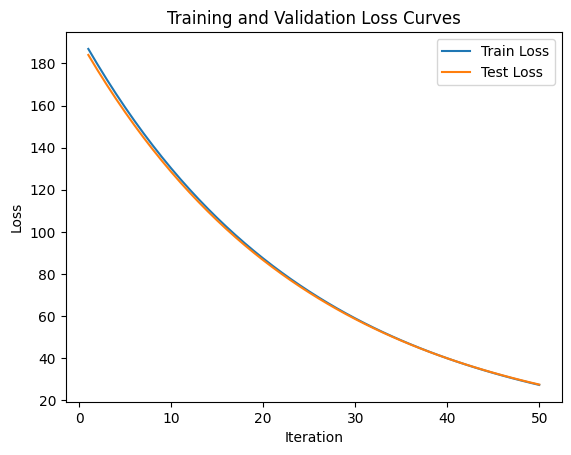

In [ ]:
model_simple = SimpleNet(input_size, output_size)
optimizer_simple = optim.SGD(model_simple.parameters(), lr=0.0001)
train_model(model_simple, nn.MSELoss(), optimizer_simple, train_dataloader, test_dataloader, num_epochs=50)


Эпоха [10/50], Train Loss: 151.1933, Test Loss: 148.8277
Эпоха [20/50], Train Loss: 75.6745, Test Loss: 72.9123
Эпоха [30/50], Train Loss: 20.5042, Test Loss: 19.5055
Эпоха [40/50], Train Loss: 2.8911, Test Loss: 3.2222
Эпоха [50/50], Train Loss: 0.9051, Test Loss: 1.3560


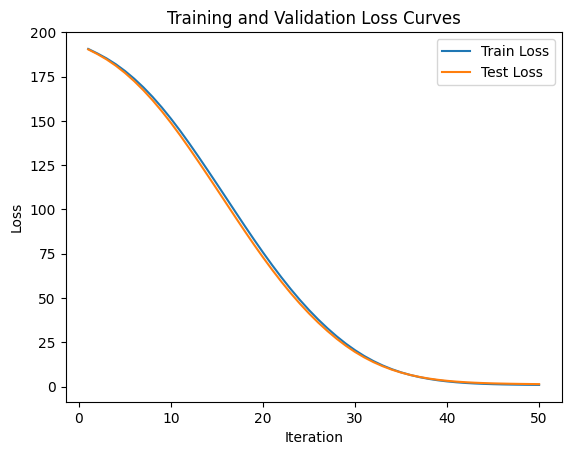

In [ ]:
model_neural = NeuralNetwork(input_size, 64, output_size)
optimizer_neural = optim.Adam(model_neural.parameters(), lr=0.0001)
train_model(model_neural, nn.MSELoss(), optimizer_neural, train_dataloader, test_dataloader, num_epochs=50)


Эпоха [10/50], Train Loss: 69.3226, Test Loss: 52.9231
Эпоха [20/50], Train Loss: 0.9954, Test Loss: 1.7234
Эпоха [30/50], Train Loss: 0.5692, Test Loss: 0.9721
Эпоха [40/50], Train Loss: 0.4024, Test Loss: 0.6306
Эпоха [50/50], Train Loss: 0.3228, Test Loss: 0.4706


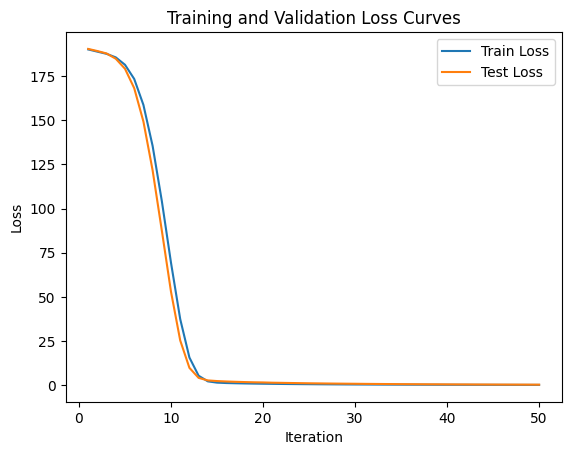

In [ ]:
model_plot = HardNeuralNetwork(input_size, [64,32,16], output_size)
optimizer_plot = optim.Adam(model_plot.parameters(), lr=0.0001)
train_model(model_plot, nn.MSELoss(), optimizer_plot, train_dataloader, test_dataloader, num_epochs=50)

## Подсчёт метрик

In [ ]:
def calculate_mae(model, data_loader):
    model.eval()
    mae = 0.0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            mae += torch.abs(outputs - targets).sum().item()
    mae /= len(data_loader.dataset)
    return mae

train_mae_SimpleNet = calculate_mae(model_SimpleNet, train_dataloader)
test_mae_SimpleNet = calculate_mae(model_SimpleNet, test_dataloader)

print('SimpleNet')
print(f"MAE (train): {train_mae_SimpleNet:.4f}, MAE (test): {test_mae_SimpleNet:.4f}")

train_mae_NeuralNetwork = calculate_mae(model_NeuralNetwork, train_dataloader)
test_mae_NeuralNetwork = calculate_mae(model_NeuralNetwork, test_dataloader)


print('\nNeuralNetwork')
print(f"MAE (train): {train_mae_NeuralNetwork:.4f}, MAE (test): {test_mae_NeuralNetwork:.4f}")

train_mae_HardNeuralNetwork = calculate_mae(model_HardNeuralNetwork, train_dataloader)
test_mae_HardNeuralNetwork = calculate_mae(model_HardNeuralNetwork, test_dataloader)

print('\nHardNeuralNetwork')
print(f"MAE (train): {train_mae_HardNeuralNetwork:.4f}, MAE (test): {test_mae_HardNeuralNetwork:.4f}")

SimpleNet
MAE (train): 1.9309, MAE (test): 1.9969

NeuralNetwork
MAE (train): 0.3685, MAE (test): 0.3982

HardNeuralNetwork
MAE (train): 0.2207, MAE (test): 0.3439


Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
- Какая модель справилась лучше с поставленной задачей? Лучше всего с задачей справилась HardNeuralNetwork, т.к у нее наименьшие показатели MAE среди остальных моделей

- Имеет ли место переобучение? Все модели показывают хорошие результаты на train и test, не видно явного переобучения
- Имеет ли место недообучение? Возможно у SimpleNet, т.к. у него простая модель и он не смог нормально обучиться
- Как можно улучшить метрики моделей? Увеличить сложность модели, добавив дополнительные слои, уменьшить learnin rate и посмотреть результат
